In [1]:
### Steps
# Preprocess data in R 
# Load in data
# Create training and testing data
# Run model with random cv search
# Figure out how to evaluate the model (get multiple measures at once)
# Save the model
# Export the predicted values
# Load in the model and run again with new data from FHHC
import pandas as pd
### Have all columns displayed
pd.options.display.max_columns = None
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
house_dat = pd.read_csv("house_dat_8_13_20.csv", delimiter = ",")

In [3]:
house_dat.head()

,Quarter,Gender,RaceWhite,RaceBlack,Agegroup,OverallHealth,CapableManagingHealthCareNeeds,HandlingDailyLife,ControlLife,DealWithCrisis,GetsAlongWithFamily,SocialSituations,FunctioningHousing,Symptoms,Nervous,Hopeless,Restless,Depressed,EverythingEffort,Worthless,PsychologicalEmotionalProblems,LifeQuality,EnoughEnergyForEverydayLife,PerformDailyActivitiesSatisfaction,HealthSatisfaction,RelationshipSatisfaction,SelfSatisfaction,Tobacco_Use,Alcohol_Use,Cannabis_Use,ViolenceTrauma,Housing,Education,Employment,EnoughMoneyForNeeds,Friendships,EnjoyPeople,BelongInCommunity,SupportFromFamily,SupportiveFamilyFriends,GenerallyAccomplishGoal,telehealth,Housing.y,grant,EverServed,ActiveDuty_Else,NightsHomeless,aiety,mdd_r,mdd_s,another_s_ident,drug_use,er_hos_use_base,jail_arrest_base
0,2,1,0,1,8.0,4.0,3.0,2.0,3.0,2.0,3.0,2.0,4.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,2.0,2.4,4.0,4.0,1.0,2.0,1.0,1,12.0,0,4.0,4.0,2.0,4.0,3.0,3.0,4.0,0,1,0,0,1,0.0,0,0,0,0,9.0,0.0,0.0
1,1,0,1,0,6.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,3.0,4.0,5.0,4.0,5.0,3.0,4.0,2.0,1.0,1.0,1.0,0,13.0,1,2.0,5.0,4.0,4.0,4.0,4.0,4.0,0,1,0,0,0,12.0,0,0,0,1,12.0,0.0,0.0
2,1,0,1,0,8.0,2.0,1.0,2.0,4.0,4.0,1.0,5.0,1.0,2.0,4.0,4.0,4.0,3.0,3.0,4.0,5.0,2.0,4.0,5.0,5.0,3.2,1.6,4.0,1.0,1.0,1.0,0,14.0,0,3.0,2.0,4.0,4.0,2.0,5.0,5.0,0,1,0,0,0,26.0,0,0,0,0,9.0,4.0,2.0
3,1,1,1,0,7.0,4.0,2.0,2.0,2.0,4.0,1.0,4.0,1.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,0,14.0,0,1.0,3.0,2.0,1.0,2.0,2.0,4.0,0,0,0,0,1,30.0,0,1,0,0,9.0,0.0,0.0
4,2,0,0,1,7.0,2.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,5.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1,14.0,0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0,1,0,0,1,0.0,0,0,0,0,12.0,0.0,0.0


In [4]:
house_dat.shape

(2101, 54)

In [5]:
### Break into testing and training
from sklearn.model_selection import train_test_split
y = house_dat[["Housing.y"]]
predictors = house_dat.drop(["Housing.y"], axis = 1)
### Need to make this a horitzontal array and numpy for XGBClassifier
y = y.values.ravel()
predictors_names = predictors
predictors = predictors.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size = .20, random_state = 53)

In [6]:
y_train

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [7]:
### Just show that you can run the model do the Randomized Search later
from sklearn.model_selection import RandomizedSearchCV
xclas = XGBClassifier()  # and for classifier  
xclas.fit(X_train, y_train)  
pred_xclas =  xclas.predict(X_test)
pred_xclas

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
scoring = ['accuracy', 'precision', "recall", 'balanced_accuracy']
cv_results = cross_validate(xclas.fit(X_train, y_train) , X_train, y_train, cv=5, scoring=scoring)
cv_results

{'fit_time': array([0.1870029 , 0.21698952, 0.16600394, 0.16499615, 0.15301442]),
 'score_time': array([0.00400591, 0.00300074, 0.00400114, 0.00400519, 0.00398874]),
 'test_accuracy': array([0.86011905, 0.86607143, 0.85416667, 0.86011905, 0.83333333]),
 'test_precision': array([0.8650519 , 0.88970588, 0.86363636, 0.88321168, 0.86545455]),
 'test_recall': array([0.96899225, 0.94163424, 0.96108949, 0.94163424, 0.92607004]),
 'test_balanced_accuracy': array([0.73449612, 0.7809437 , 0.7337093 , 0.76828548, 0.7288578 ])}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

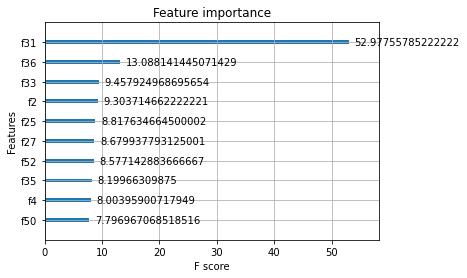

In [9]:
## Get feature importance
## Figure out how to rename the fature later
from xgboost import plot_importance
from xgboost import plot_tree
plot_importance(xclas, max_num_features =10, importance_type = "gain")
#plot_tree(xclas)

In [10]:
### Get a confusion matrix and then get sensitivity by hand
con_mat = confusion_matrix(y_test, pred_xclas)
#sensitivity <- TP / (TP + FN)
#specificity <- TN / (TN + FP)
con_mat
#tn, fp, fn, tp
sensitivity =  con_mat[1][1] / (con_mat[1][1] + con_mat[1][0])
specificity = con_mat[0][0] / (con_mat[0][0] + con_mat[0][1])
### 
balanced_accuracy =  (sensitivity+specificity)/2


In [11]:
### Make easier to see need to create individual data frames then place into a frame variable then place into a data frame concat in pd axis =1 means add them across the columns
sensitivity = pd.DataFrame(sensitivity, columns = ["sensitivity"], index = [0])
specificity = pd.DataFrame(specificity, columns = ["specificity"], index = [0])
balanced_accuracy = pd.DataFrame(balanced_accuracy, columns = ["balanced_accuracy"], index = [0])

frames = [sensitivity, specificity, balanced_accuracy]
metrics_dat = pd.concat(frames, axis = 1)
metrics_dat.round(2)

,sensitivity,specificity,balanced_accuracy
0,0.93,0.64,0.79


In [12]:
# Figure out good values for these
## sum(negative instances) / sum(positive instances)
## Good for unbalanced weights
#Description of the parameters: https://xgboost.readthedocs.io/en/latest/parameter.html
y_panda = pd.DataFrame(y)
y_panda.describe()

,0
count,2101.000000
mean,0.757734
std,0.428556
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
# Develop develop one for random grid search
# Max depth is how deep the tree will go 
# Eta is the learning rate this takes the difference between the model predicted and actual value mutiplied to make alterations to the weights
# Colsample_bytree take a sample of the trees
params = {  
    "max_depth": [6,12,15, 18],
    "eta": [.01, .001, .3],
    "colsample_bytree": [.5, .6, .7],
    "subsample": [.5, .6, .7],
    'lambda': [1, 1.1, 1.2, 1.3, 1.4],
    'alpha': [0, .1, .2, .3],
    "scale_pos_weight ": [.25, .5, 1],
}

In [14]:
### Why n_jobs = -1?
xclas_random = XGBClassifier()
gs = RandomizedSearchCV(xclas_random, params, n_jobs=-1, cv = 10)  
gs.fit(X_train, y_train)  

RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 0.2, 0.3],
                                        'colsample_bytree': [0.5, 0.6, 0.7],
                                        'eta': [0.01, 0.001, 0.3],
                                        'lambda': [1, 1.1, 1.2, 1.3, 1.4],
                                        'max_depth': [6, 12, 15, 18],
                                        'scale_pos_weight ': [0.25, 0.5, 1],
                                        'subsample': [0.5, 0.6, 0.7]})

In [15]:
#best_estimator_
#best_score_ 
#best_params_
### Put this into a data frame
gs.best_estimator_



XGBClassifier(alpha=0, colsample_bytree=0.6, eta=0.001, lambda=1.2,
              max_depth=15, scale_pos_weight =0.5, subsample=0.6)

In [16]:
gs.best_score_
scoring

['accuracy', 'precision', 'recall', 'balanced_accuracy']

In [22]:
params_best = {  
    "max_depth": [18],
    "eta": [.01],
    "colsample_bytree": [.6],
    "subsample": [.6],
    'lambda': [1.2],
    'alpha': [.3],
    "scale_pos_weight ": [.25],
}
best_model = XGBClassifier(params = params_best)  # and for classifier
best_model.fit(X_train, y_train)
# Run this model so you can feature importance
cv_results_best_model = cross_validate(best_model.fit(X_train, y_train) , X_train, y_train, cv=10, scoring=scoring)
#cv_results
cv_results_best_model
cv_results_best_model = pd.DataFrame(cv_results_best_model)
cv_results_best_model.round(2)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_balanced_accuracy
0,0.20,0.00,0.84,0.85,0.96,0.70
1,0.20,0.00,0.85,0.87,0.95,0.73
2,0.25,0.00,0.87,0.90,0.94,0.79
3,0.23,0.00,0.88,0.89,0.96,0.79
4,0.23,0.01,0.86,0.88,0.95,0.77
5,0.27,0.01,0.86,0.86,0.97,0.73
6,0.31,0.00,0.89,0.89,0.98,0.79
7,0.30,0.01,0.84,0.87,0.92,0.75
8,0.30,0.00,0.85,0.85,0.96,0.72
9,0.27,0.00,0.79,0.84,0.90,0.67


<AxesSubplot:>

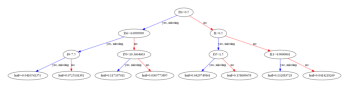

In [30]:
plot_tree(best_model, num_trees = 1)

In [28]:
# Get feature importance
from xgboost import plot_importance
from xgboost import plot_tree
importance = best_model.get_booster().get_score(importance_type='gain')
importance = pd.DataFrame(data = importance, index= [0])
importance =  importance.round(2)
importance_t = importance.transpose()
importance_t = pd.DataFrame(importance_t)
importance_t["feature"] = importance_t.index
importance_t.columns = ["importance", "feature"]
#importance_t.shape
### Just get the top ten and rename those and sort by importance
importance_t = importance_t.sort_values(by= ["importance"], ascending=False)
importance_t_ten = importance_t.iloc[0:9]
importance_t_ten['features_name'] = ["Housing", "EnjoyPeople", "Employment", "RaceWhite", "RelationshipSatisfaction", "Tobacco_Use", "jail_arrest_base", "Friendships", "Agegroup"]


C:\Users\Matthew.Hanauer\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,importance,feature,features_name
f31,52.98,f31,Housing
f36,13.09,f36,EnjoyPeople
f33,9.46,f33,Employment
f2,9.30,f2,RaceWhite
f25,8.82,f25,RelationshipSatisfaction
f27,8.68,f27,Tobacco_Use
f52,8.58,f52,jail_arrest_base
f35,8.20,f35,Friendships
f4,8.00,f4,Agegroup


In [35]:
import plotly.express as px
fig = px.bar(importance_t_ten, x='importance', 
            y='features_name', 
            labels = {"importance": "Importance", "features_name": "Feature"},
            title = "Top 10 feature importance",
            text = "importance", 
            category_orders  = {"features_name": ["Housing", "EnjoyPeople", "Employment", "RaceWhite", "RelationshipSatisfaction", "Tobacco_Use", "jail_arrest_base", "Friendships", "Agegroup"]})
fig
#predictors_ordered.rename(columns={"Quarter": "f0", "Gender"

In [109]:
importance_t_ten["importance"]

f31    52.98
f36    13.09
f33     9.46
f2      9.30
f25     8.82
f27     8.68
f52     8.58
f35     8.20
f4      8.00
Name: importance, dtype: float64

In [101]:
data_canada

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.750,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.960,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.300,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.130,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.880,22284500,18970.57086,CAN,124
245,Canada,Americas,1977,74.210,23796400,22090.88306,CAN,124
246,Canada,Americas,1982,75.760,25201900,22898.79214,CAN,124
247,Canada,Americas,1987,76.860,26549700,26626.51503,CAN,124
248,Canada,Americas,1992,77.950,28523502,26342.88426,CAN,124
249,Canada,Americas,1997,78.610,30305843,28954.92589,CAN,124


In [54]:
predictors_names.columns
predictors_names.shape

(2101, 53)

In [19]:
pred_best_random =  gs.predict(X_test)
pred_best_random

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [20]:
### Get a confusion matrix and then get sensitivity by hand
con_mat = confusion_matrix(y_test, pred_best_random)
#sensitivity <- TP / (TP + FN)
#specificity <- TN / (TN + FP)
con_mat
#tn, fp, fn, tp
sensitivity =  con_mat[1][1] / (con_mat[1][1] + con_mat[1][0])
specificity = con_mat[0][0] / (con_mat[0][0] + con_mat[0][1])
accuracy = (con_mat[1][1] + con_mat[0][0]) / (con_mat[1][1] + con_mat[1][0] + con_mat[0][0] + con_mat[0][1])
### 
balanced_accuracy =  (sensitivity+specificity)/2

In [21]:
sensitivity = pd.DataFrame(sensitivity, columns = ["sensitivity"], index = [0])
specificity = pd.DataFrame(specificity, columns = ["specificity"], index = [0])
accuracy = pd.DataFrame(accuracy, columns = ["accuracy"], index = [0 ])
balanced_accuracy = pd.DataFrame(balanced_accuracy, columns = ["balanced_accuracy"], index = [0])

frames = [sensitivity, specificity, balanced_accuracy, accuracy]
metrics_dat = pd.concat(frames, axis = 1)
metrics_dat = metrics_dat.round(2)
metrics_dat

,sensitivity,specificity,balanced_accuracy,accuracy
0,0.95,0.63,0.79,0.86


In [19]:
### Need to get the predicted probabilities
pred_prob =  gs.predict_proba(X_test)
prob_housed =   pd.DataFrame(pred_prob[:,1], columns = ["prob_housed"])
def if_else(row):

    if row['prob_housed'] < .25:

        val = "very high risk"

    elif row['prob_housed'] < .5:

        val = "high risk"
    
    elif row['prob_housed'] <.75:
        
        val = "medium risk"
    
    else:

        val = "low risk"

    return val

prob_housed['risk_level'] = prob_housed.apply(if_else, axis=1)
prob_housed
#prob_housed['risk_level'].value_counts()
        

,prob_housed,risk_level
0,0.995971,low risk
1,0.309309,high risk
2,0.963278,low risk
3,0.943605,low risk
4,0.135545,very high risk
...,...,...
416,0.057088,very high risk
417,0.484293,high risk
418,0.953670,low risk
419,0.869249,low risk


In [23]:
### Now save the model
import pickle
import joblib
#gs_8_21_20 = gs 
#filename = "gs_8_21_20.sav"
#joblib.dump(gs_8_21_20, filename)
filename = "gs_8_21_20.sav"
load_model = joblib.load(filename)
load_model

RandomizedSearchCV(cv=10, estimator=XGBClassifier(missing=nan), n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 0.2, 0.3],
                                        'colsample_bytree': [0.5, 0.6, 0.7],
                                        'eta': [0.01, 0.001, 0.3],
                                        'lambda': [1, 1.1, 1.2, 1.3, 1.4],
                                        'max_depth': [6, 12, 15, 18],
                                        'scale_pos_weight ': [0.25, 0.5, 1],
                                        'subsample': [0.5, 0.6, 0.7]})

In [24]:
new_dat_pred = house_dat.drop(["Housing.y"], axis = 1)
list(new_dat_pred.columns.values) 

['Quarter',
 'Gender',
 'RaceWhite',
 'RaceBlack',
 'Agegroup',
 'OverallHealth',
 'CapableManagingHealthCareNeeds',
 'HandlingDailyLife',
 'ControlLife',
 'DealWithCrisis',
 'GetsAlongWithFamily',
 'SocialSituations',
 'FunctioningHousing',
 'Symptoms',
 'Nervous',
 'Hopeless',
 'Restless',
 'Depressed',
 'EverythingEffort',
 'Worthless',
 'PsychologicalEmotionalProblems',
 'LifeQuality',
 'EnoughEnergyForEverydayLife',
 'PerformDailyActivitiesSatisfaction',
 'HealthSatisfaction',
 'RelationshipSatisfaction',
 'SelfSatisfaction',
 'Tobacco_Use',
 'Alcohol_Use',
 'Cannabis_Use',
 'ViolenceTrauma',
 'Housing',
 'Education',
 'Employment',
 'EnoughMoneyForNeeds',
 'Friendships',
 'EnjoyPeople',
 'BelongInCommunity',
 'SupportFromFamily',
 'SupportiveFamilyFriends',
 'GenerallyAccomplishGoal',
 'telehealth',
 'grant',
 'EverServed',
 'ActiveDuty_Else',
 'NightsHomeless',
 'aiety',
 'mdd_r',
 'mdd_s',
 'another_s_ident',
 'drug_use',
 'er_hos_use_base',
 'jail_arrest_base']

In [31]:
### Replicate data cleaning from r ehr_machine_learning
fhhc_house_test_dat = pd.read_csv("fhhc_house_dat_8_21_20.csv", delimiter = ",")
### Get two specific ids for baseline then subset
#'1096', '1095'
### Create filter variable
new_clients = ["1097'"]
fhhc_house_test_dat = fhhc_house_test_dat[fhhc_house_test_dat["ConsumerID"].isin(new_clients)]
### Now get the variables from above
fhhc_house_test_dat

,ConsumerID,GrantID,SiteID,InterviewType_07,ConsumerType_07,ReassessmentNumber_07,Assessment,ConductedInterview,WhyNotConducted,WhyNotConducted_10,NextReassessment_10,SubmittedAtClinicalDischarge_10,InterviewDate,FirstReceivedServicesDate,FFY,Quarter,Month,RecordStatus,DiagnosisOne,DiagnosisOneCategory,DiagnosisTwo,DiagnosisTwoCategory,DiagnosisThree,DiagnosisThreeCategory,Gender,GenderSpec,HispanicLatino,EthnicCentralAmerican,EthnicCuban,EthnicDominican,EthnicMexican,EthnicPuertoRican,EthnicSouthAmerican,EthnicOther,EthnicOtherSpec,RaceBlack,RaceAsian,RaceNativeHawaiian,RaceAlaskaNative,RaceWhite,RaceAmericanIndian,DOB,Agegroup,SexualIdentity,SexualIdentityOther,Si_Assessment,OverallHealth,CapableManagingHealthCareNeeds,HandlingDailyLife,ControlLife,DealWithCrisis,GetsAlongWithFamily,SocialSituations,SchoolOrWork,FunctioningHousing,Symptoms,Nervous,Hopeless,Restless,Depressed,EverythingEffort,Worthless,PsychologicalEmotionalProblems,LifeQuality,EnoughEnergyForEverydayLife,PerformDailyActivitiesSatisfaction,HealthSatisfaction,SelfSatisfaction,RelationshipSatisfaction,Tobacco_Use,Alcohol_Use,Al_Use_5orMore_Male,Al_Use_4orMore_NotMale,Cannabis_Use,Cocaine_Use,Stimulants_Use,Meth_Use,Inhalants_Use,Sedatives_Use,Hallucinogens_Use,StreetOpioids_Use,RxOpioids_Use,Other_Use,Other_UseSpec,GAFDate,GAFScore,EverServed,ES_ArmedForces,ES_Reserves,ES_NationalGuard,ActiveDuty_Self,AD_ArmedForces,AD_Reserves,AD_NationalGuard,EverDeployed,ED_IraqAfghan,ED_PersianGulf,ED_VietnamSEAsia,ED_Korea,ED_WWII,ED_Other,ActiveDuty_Else,AD_P1Relationship_11,AD_P1Rel_OtherSpec_11,AD_P1CombatOpr_11,AD_P1Injured_11,AD_P1Stress_11,AD_P1Died_11,AD_P2Relationship_11,AD_P2Rel_OtherSpec_11,AD_P2CombatOpr_11,AD_P2Injured_11,AD_P2Stress_11,AD_P2Died_11,AD_P3Relationship_11,AD_P3Rel_OtherSpec_11,AD_P3CombatOpr_11,AD_P3Injured_11,AD_P3Stress_11,AD_P3Died_11,AD_P4Relationship_11,AD_P4Rel_OtherSpec_11,AD_P4CombatOpr_11,AD_P4Injured_11,AD_P4Stress_11,AD_P4Died_11,AD_P5Relationship_11,AD_P5Rel_OtherSpec_11,AD_P5CombatOpr_11,AD_P5Injured_11,AD_P5Stress_11,AD_P5Died_11,AD_P6Relationship_11,AD_P6Rel_OtherSpec_11,AD_P6CombatOpr_11,AD_P6Injured_11,AD_P6Stress_11,AD_P6Died_11,ViolenceTrauma,VT_NightmaresThoughts,VT_NotThinkAboutIt,VT_OnGuard,VT_NumbDetached,PhysicallyHurt,NightsHomeless,NightsHospitalMHC,NightsDetox,NightsJail,TimesER,Housing,OtherHousingSpec,LivingConditionsSatisfaction,Enrolled,OtherEnrolledSpec,Education,Employment,OtherEmploymentSpec,EmploymentType_07,Employed_MinWageOrAbove,Employed_PaidDirectly,Employed_AnyoneApplied,EnoughMoneyForNeeds,NumTimesArrested,Recover,Complain,Rights,Responsibility,SideEffects,SharingTreatmentInformation,SensitiveToCulture,InformationNeeded,ConsumerRunPrograms,ComfortableAskingQuestions,TreatmentGoals,LikeServices,Choices,RecommendAgency,WhoAdministered,WhoAdministered_OtherSpec,Friendships,EnjoyPeople,BelongInCommunity,SupportFromFamily,SupportiveFamilyFriends,GenerallyAccomplishGoal,ReassessmentStatus_07,OtherReassessment_07,NoContact90Days,StillReceivingServices,DischargeDate,DischargeStatus,OtherDischargeStatus,LastServiceDate,Svc_Screening,Svc_Assessment,Svc_TreatmentPlanning,Svc_Psychopharmacological,Svc_MentalHealth,Svc_MentalHealthFreq_07,Svc_MentalHealthFreq,Svc_MH_FreqPeriod,Svc_CoOccuring,Svc_CaseManagement,Svc_TraumaSpecific,Svc_ReferredCore,Svc_MedicalCare,Svc_Employment,Svc_Family,Svc_ChildCare,Svc_Transportation,Svc_Education,Svc_Housing,Svc_SocialRecreational,Svc_ConsumerOperated,Svc_HIVTesting,Svc_ReferredSupport
227,1097',SM80690,COI_DS,1,-4,-4,600,1,-1,-4,-4,-4,8/18/2020,7/15/2020,2020,4,8,0,59,1,-1,-1,-1,-1,1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,0,0,0,10/15/1969,7,1,NaN,600,5,2,2,4,3,4,4,2,3,1,2,4,3,1,4,4,4,2,1,2,2,2,2,3,1,-1,-1,1,1,1,1,1,1,1,1,1,1,-1,06/01/1869,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,1,1,1,1,1,1,7,0,0,0,0,2,-1,2,0,-1,12,7,-1,-4,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,

In [32]:
predictors = fhhc_house_test_dat[['Quarter',
 'Gender',
 'RaceWhite',
 'RaceBlack',
 'Agegroup',
 'OverallHealth',
 'CapableManagingHealthCareNeeds',
 'HandlingDailyLife',
 'ControlLife',
 'DealWithCrisis',
 'GetsAlongWithFamily',
 'SocialSituations',
 'FunctioningHousing',
 'Symptoms',
 'Nervous',
 'Hopeless',
 'Restless',
 'Depressed',
 'EverythingEffort',
 'Worthless',
 'PsychologicalEmotionalProblems',
 'LifeQuality',
 'EnoughEnergyForEverydayLife',
 'PerformDailyActivitiesSatisfaction',
 'HealthSatisfaction',
 'RelationshipSatisfaction',
 'SelfSatisfaction',
 'Tobacco_Use',
 'Alcohol_Use',
 'Cannabis_Use',
 'ViolenceTrauma',
 'Housing',
 'Education',
 'Employment',
 'EnoughMoneyForNeeds',
 'Friendships',
 'EnjoyPeople',
 'BelongInCommunity',
 'SupportFromFamily',
 'SupportiveFamilyFriends',
 'GenerallyAccomplishGoal',
 'EverServed',
 'ActiveDuty_Else',
 'NightsHomeless']]
predictors

,Quarter,Gender,RaceWhite,RaceBlack,Agegroup,OverallHealth,CapableManagingHealthCareNeeds,HandlingDailyLife,ControlLife,DealWithCrisis,GetsAlongWithFamily,SocialSituations,FunctioningHousing,Symptoms,Nervous,Hopeless,Restless,Depressed,EverythingEffort,Worthless,PsychologicalEmotionalProblems,LifeQuality,EnoughEnergyForEverydayLife,PerformDailyActivitiesSatisfaction,HealthSatisfaction,RelationshipSatisfaction,SelfSatisfaction,Tobacco_Use,Alcohol_Use,Cannabis_Use,ViolenceTrauma,Housing,Education,Employment,EnoughMoneyForNeeds,Friendships,EnjoyPeople,BelongInCommunity,SupportFromFamily,SupportiveFamilyFriends,GenerallyAccomplishGoal,EverServed,ActiveDuty_Else,NightsHomeless
227,4,1,0,1,7,5,2,2,4,3,4,4,3,1,2,4,3,1,4,4,4,2,1,2,2,2,2,3,1,1,1,2,12,7,1,2,3,4,4,4,2,0,2,7


In [33]:
fhhc_house_test_dat

,ConsumerID,GrantID,SiteID,InterviewType_07,ConsumerType_07,ReassessmentNumber_07,Assessment,ConductedInterview,WhyNotConducted,WhyNotConducted_10,NextReassessment_10,SubmittedAtClinicalDischarge_10,InterviewDate,FirstReceivedServicesDate,FFY,Quarter,Month,RecordStatus,DiagnosisOne,DiagnosisOneCategory,DiagnosisTwo,DiagnosisTwoCategory,DiagnosisThree,DiagnosisThreeCategory,Gender,GenderSpec,HispanicLatino,EthnicCentralAmerican,EthnicCuban,EthnicDominican,EthnicMexican,EthnicPuertoRican,EthnicSouthAmerican,EthnicOther,EthnicOtherSpec,RaceBlack,RaceAsian,RaceNativeHawaiian,RaceAlaskaNative,RaceWhite,RaceAmericanIndian,DOB,Agegroup,SexualIdentity,SexualIdentityOther,Si_Assessment,OverallHealth,CapableManagingHealthCareNeeds,HandlingDailyLife,ControlLife,DealWithCrisis,GetsAlongWithFamily,SocialSituations,SchoolOrWork,FunctioningHousing,Symptoms,Nervous,Hopeless,Restless,Depressed,EverythingEffort,Worthless,PsychologicalEmotionalProblems,LifeQuality,EnoughEnergyForEverydayLife,PerformDailyActivitiesSatisfaction,HealthSatisfaction,SelfSatisfaction,RelationshipSatisfaction,Tobacco_Use,Alcohol_Use,Al_Use_5orMore_Male,Al_Use_4orMore_NotMale,Cannabis_Use,Cocaine_Use,Stimulants_Use,Meth_Use,Inhalants_Use,Sedatives_Use,Hallucinogens_Use,StreetOpioids_Use,RxOpioids_Use,Other_Use,Other_UseSpec,GAFDate,GAFScore,EverServed,ES_ArmedForces,ES_Reserves,ES_NationalGuard,ActiveDuty_Self,AD_ArmedForces,AD_Reserves,AD_NationalGuard,EverDeployed,ED_IraqAfghan,ED_PersianGulf,ED_VietnamSEAsia,ED_Korea,ED_WWII,ED_Other,ActiveDuty_Else,AD_P1Relationship_11,AD_P1Rel_OtherSpec_11,AD_P1CombatOpr_11,AD_P1Injured_11,AD_P1Stress_11,AD_P1Died_11,AD_P2Relationship_11,AD_P2Rel_OtherSpec_11,AD_P2CombatOpr_11,AD_P2Injured_11,AD_P2Stress_11,AD_P2Died_11,AD_P3Relationship_11,AD_P3Rel_OtherSpec_11,AD_P3CombatOpr_11,AD_P3Injured_11,AD_P3Stress_11,AD_P3Died_11,AD_P4Relationship_11,AD_P4Rel_OtherSpec_11,AD_P4CombatOpr_11,AD_P4Injured_11,AD_P4Stress_11,AD_P4Died_11,AD_P5Relationship_11,AD_P5Rel_OtherSpec_11,AD_P5CombatOpr_11,AD_P5Injured_11,AD_P5Stress_11,AD_P5Died_11,AD_P6Relationship_11,AD_P6Rel_OtherSpec_11,AD_P6CombatOpr_11,AD_P6Injured_11,AD_P6Stress_11,AD_P6Died_11,ViolenceTrauma,VT_NightmaresThoughts,VT_NotThinkAboutIt,VT_OnGuard,VT_NumbDetached,PhysicallyHurt,NightsHomeless,NightsHospitalMHC,NightsDetox,NightsJail,TimesER,Housing,OtherHousingSpec,LivingConditionsSatisfaction,Enrolled,OtherEnrolledSpec,Education,Employment,OtherEmploymentSpec,EmploymentType_07,Employed_MinWageOrAbove,Employed_PaidDirectly,Employed_AnyoneApplied,EnoughMoneyForNeeds,NumTimesArrested,Recover,Complain,Rights,Responsibility,SideEffects,SharingTreatmentInformation,SensitiveToCulture,InformationNeeded,ConsumerRunPrograms,ComfortableAskingQuestions,TreatmentGoals,LikeServices,Choices,RecommendAgency,WhoAdministered,WhoAdministered_OtherSpec,Friendships,EnjoyPeople,BelongInCommunity,SupportFromFamily,SupportiveFamilyFriends,GenerallyAccomplishGoal,ReassessmentStatus_07,OtherReassessment_07,NoContact90Days,StillReceivingServices,DischargeDate,DischargeStatus,OtherDischargeStatus,LastServiceDate,Svc_Screening,Svc_Assessment,Svc_TreatmentPlanning,Svc_Psychopharmacological,Svc_MentalHealth,Svc_MentalHealthFreq_07,Svc_MentalHealthFreq,Svc_MH_FreqPeriod,Svc_CoOccuring,Svc_CaseManagement,Svc_TraumaSpecific,Svc_ReferredCore,Svc_MedicalCare,Svc_Employment,Svc_Family,Svc_ChildCare,Svc_Transportation,Svc_Education,Svc_Housing,Svc_SocialRecreational,Svc_ConsumerOperated,Svc_HIVTesting,Svc_ReferredSupport
227,1097',SM80690,COI_DS,1,-4,-4,600,1,-1,-4,-4,-4,8/18/2020,7/15/2020,2020,4,8,0,59,1,-1,-1,-1,-1,1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,0,0,0,10/15/1969,7,1,NaN,600,5,2,2,4,3,4,4,2,3,1,2,4,3,1,4,4,4,2,1,2,2,2,2,3,1,-1,-1,1,1,1,1,1,1,1,1,1,1,-1,06/01/1869,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4,1,1,1,1,1,1,7,0,0,0,0,2,-1,2,0,-1,12,7,-1,-4,-1,-1,-1,1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,

In [34]:
### Variables to create
#'telehealth', 'grant','aiety','mdd_r', 'mdd_s', 'another_s_ident', 'drug_use', 'er_hos_use_base', 'jail_arrest_base'
telehealth = [1]
### These variables are created outside of the data set and if you set the index to match the other variables it will align with them when you create a pandas data set
## Make the index number with the from output above
telehealth = pd.DataFrame(data = telehealth, columns = ["telehealth"], index = [227])
### Remember CCBHC or not
grant = [0]
## Index 
grant = pd.DataFrame(data = grant, columns = ["grant"], index = [227])


def if_else(row):

    if row['DiagnosisOne'] == 62:
        val= 1
    else:

        val = 0

    return val

aiety =  fhhc_house_test_dat.apply(if_else, axis=1)
aiety = pd.DataFrame(data = aiety, columns = ["aiety"])


def if_else(row):

    if row['DiagnosisOne'] == 59:
        val= 1
    else:

        val = 0

    return val

mdd_r =  fhhc_house_test_dat.apply(if_else, axis=1)
mdd_r = pd.DataFrame(data = mdd_r, columns = ["mdd_r"])

def if_else(row):

    if row['DiagnosisOne'] == 58:
        val= 1
    else:

        val = 0

    return val

mdd_s =  fhhc_house_test_dat.apply(if_else, axis=1)
mdd_s = pd.DataFrame(data = mdd_s, columns = ["mdd_s"])
mdd_s


def if_else(row):

    if row['SexualIdentity'] > 1:
        val= 1
    else:

        val = 0

    return val

another_s_ident =  fhhc_house_test_dat.apply(if_else, axis=1)
another_s_ident = pd.DataFrame(data = another_s_ident, columns = ["another_s_ident"])

def if_else(row):

    if row['Housing'] == 1:
        val= 1
    else:

        val = 0

    return val

Housing =  fhhc_house_test_dat.apply(if_else, axis=1)
Housing = pd.DataFrame(data = Housing, columns = ["Housing"])
Housing

drug_use = fhhc_house_test_dat["Cocaine_Use"] +fhhc_house_test_dat["Meth_Use"] + fhhc_house_test_dat["StreetOpioids_Use"] +  fhhc_house_test_dat["RxOpioids_Use"] + fhhc_house_test_dat["Stimulants_Use"]  + fhhc_house_test_dat["Inhalants_Use"] +  fhhc_house_test_dat["Sedatives_Use"] + fhhc_house_test_dat["Hallucinogens_Use"] + fhhc_house_test_dat["Other_Use"]
drug_use = pd.DataFrame(data = drug_use, columns = ["drug_use"])
drug_use

er_hos_use_base = fhhc_house_test_dat["NightsDetox"] + fhhc_house_test_dat["NightsHospitalMHC"] + fhhc_house_test_dat["TimesER"]
er_hos_use_base = pd.DataFrame(data = er_hos_use_base,columns = ["er_hos_use_base"])
er_hos_use_base

jail_arrest_base = fhhc_house_test_dat["NightsJail"] + fhhc_house_test_dat["NumTimesArrested"]
jail_arrest_base = pd.DataFrame(data = jail_arrest_base, columns = ["jail_arrest_base"])
jail_arrest_base

#### Need reformat these variables and drop from predictors
### Change gender to male or female / another gender identity
#machine_dat$Gender.x = ifelse(machine_dat$Gender.x == 1,1,0)

#### Employment 
#machine_dat$Employment.x = ifelse(machine_dat$Employment.x <3,1,0)

def if_else(row):

    if row['Gender'] > 1:
        val= 1
    else:

        val = 0

    return val

Gender =  fhhc_house_test_dat.apply(if_else, axis=1)
Gender = pd.DataFrame(data = Gender, columns = ["Gender"])

def if_else(row):

    if row['Employment'] < 3:
        val= 1
    else:

        val = 0

    return val

Employment =  fhhc_house_test_dat.apply(if_else, axis=1)
Employment = pd.DataFrame(data = Employment, columns = ["Employment"])
### Variables to drop Gender, Employment

In [35]:
predictors = predictors.drop(["Gender", "Employment"], axis = 1)
predictors

,Quarter,RaceWhite,RaceBlack,Agegroup,OverallHealth,CapableManagingHealthCareNeeds,HandlingDailyLife,ControlLife,DealWithCrisis,GetsAlongWithFamily,SocialSituations,FunctioningHousing,Symptoms,Nervous,Hopeless,Restless,Depressed,EverythingEffort,Worthless,PsychologicalEmotionalProblems,LifeQuality,EnoughEnergyForEverydayLife,PerformDailyActivitiesSatisfaction,HealthSatisfaction,RelationshipSatisfaction,SelfSatisfaction,Tobacco_Use,Alcohol_Use,Cannabis_Use,ViolenceTrauma,Housing,Education,EnoughMoneyForNeeds,Friendships,EnjoyPeople,BelongInCommunity,SupportFromFamily,SupportiveFamilyFriends,GenerallyAccomplishGoal,EverServed,ActiveDuty_Else,NightsHomeless
227,4,0,1,7,5,2,2,4,3,4,4,3,1,2,4,3,1,4,4,4,2,1,2,2,2,2,3,1,1,1,2,12,1,2,3,4,4,4,2,0,2,7


In [36]:
#### Get quarter and gender
Quarter = predictors.iloc[:,0]
Quarter = pd.DataFrame(Quarter)
## Put together gender and quarter
#frames = [Quarter, Gender]
#quarter_gender = pd.concat(frames, axis = 1)
#quarter_gender
Education = predictors.iloc[:,31]
Education  = pd.DataFrame(Education)
Education

,Education
227,12


In [37]:
### Now get race RaceWhite to ViolenceTrauma
RaceWhite_to_ViolenceTrauma =  predictors.iloc[:,1:30]
#Need 'EnoughMoneyForNeeds' to 'NightsHomeless',
EnoughMoneyForNeeds_to_GenerallyAccomplishGoal =  predictors.iloc[:,32:39]
EnoughMoneyForNeeds_to_GenerallyAccomplishGoal
EverServed_to_NightsHomeless = predictors.iloc[:,39:42]
EverServed_to_NightsHomeless

,EverServed,ActiveDuty_Else,NightsHomeless
227,0,2,7


In [38]:
EverServed_to_NightsHomeless

,EverServed,ActiveDuty_Else,NightsHomeless
227,0,2,7


In [39]:
### Add variables to predictors
frames_post =  [aiety, mdd_r, mdd_s, another_s_ident,drug_use , er_hos_use_base , jail_arrest_base]
post_pred = pd.concat(frames_post, axis = 1)
post_pred

,aiety,mdd_r,mdd_s,another_s_ident,drug_use,er_hos_use_base,jail_arrest_base
227,0,1,0,0,9,0,0


In [40]:
frames = [Quarter, Gender, RaceWhite_to_ViolenceTrauma, Housing, Education, Employment, EnoughMoneyForNeeds_to_GenerallyAccomplishGoal, telehealth, grant, EverServed_to_NightsHomeless, post_pred]
predictors_ordered = pd.concat(frames, axis = 1)
predictors_ordered

,Quarter,Gender,RaceWhite,RaceBlack,Agegroup,OverallHealth,CapableManagingHealthCareNeeds,HandlingDailyLife,ControlLife,DealWithCrisis,GetsAlongWithFamily,SocialSituations,FunctioningHousing,Symptoms,Nervous,Hopeless,Restless,Depressed,EverythingEffort,Worthless,PsychologicalEmotionalProblems,LifeQuality,EnoughEnergyForEverydayLife,PerformDailyActivitiesSatisfaction,HealthSatisfaction,RelationshipSatisfaction,SelfSatisfaction,Tobacco_Use,Alcohol_Use,Cannabis_Use,ViolenceTrauma,Housing,Education,Employment,EnoughMoneyForNeeds,Friendships,EnjoyPeople,BelongInCommunity,SupportFromFamily,SupportiveFamilyFriends,GenerallyAccomplishGoal,telehealth,grant,EverServed,ActiveDuty_Else,NightsHomeless,aiety,mdd_r,mdd_s,another_s_ident,drug_use,er_hos_use_base,jail_arrest_base
227,4,0,0,1,7,5,2,2,4,3,4,4,3,1,2,4,3,1,4,4,4,2,1,2,2,2,2,3,1,1,1,0,12,0,1,2,3,4,4,4,2,1,0,0,2,7,0,1,0,0,9,0,0


In [106]:
# Next time scale in Python and then save the scales and apply to incoming data to put on same scale
#frames = [Quarter, Gender, RaceWhite_to_ViolenceTrauma, Housing, Education, Employment, EnoughMoneyForNeeds_to_GenerallyAccomplishGoal, telehealth, grant, EverServed_to_NightsHomeless, post_pred]
#predictors_ordered = pd.concat(frames, axis = 1)
#predictors_ordered
### Now need to scale variables
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#test = predictors_ordered
#test_means_sd  = ss.fit(test)
#test_means_sd
#pd.DataFrame(ss.transform(test), columns = test.columns) 
#ss.transform(test.iloc[:, [0,4,5,6,7,8,9,10,11,12,13,14,15, 16, 17, 18, 19, 20,21,22,23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 37 , 38, 39, 40, 45, 50,51,52]]) 

StandardScaler()

In [41]:
### Reorder predictors and put into numpy array
frames = [Quarter, Gender, RaceWhite_to_ViolenceTrauma, Housing, Education, Employment, EnoughMoneyForNeeds_to_GenerallyAccomplishGoal, telehealth, grant, EverServed_to_NightsHomeless, post_pred]
predictors_ordered = pd.concat(frames, axis = 1)
predictors_ordered

predictors_ordered.shape
### Need to rename as 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52'
predictors_ordered.rename(columns={"Quarter": "f0", "Gender": "f1", "RaceWhite": "f2", "RaceBlack": "f3", "Agegroup": "f4", "OverallHealth": "f5", "CapableManagingHealthCareNeeds": "f6", "HandlingDailyLife": "f7", "ControlLife": "f8", "DealWithCrisis": "f9", "GetsAlongWithFamily": "f10", "SocialSituations": "f11", "FunctioningHousing": "f12", "Symptoms": "f13","Nervous": "f14","Hopeless": "f15", "Restless": "f16", "Depressed": "f17", "EverythingEffort": "f18", "Worthless": "f19", "PsychologicalEmotionalProblems": "f20", "LifeQuality": "f21", "EnoughEnergyForEverydayLife": "f22", "PerformDailyActivitiesSatisfaction": "f23", "HealthSatisfaction": "f24", "RelationshipSatisfaction": "f25", "SelfSatisfaction": "f26", "Tobacco_Use": "f27", "Alcohol_Use": "f28", "Cannabis_Use": "f29", "ViolenceTrauma": "f30", "Housing": "f31", "Education": "f32", "Employment": "f33", "EnoughMoneyForNeeds": "f34", "Friendships": "f35", "EnjoyPeople": "f36", "BelongInCommunity": "f37", "SupportFromFamily": "f38", "SupportiveFamilyFriends" : "f39", "GenerallyAccomplishGoal": "f40", "telehealth": "f41", "grant": "f42", "EverServed": "f43", "ActiveDuty_Else": "f44", "NightsHomeless": "f45", "aiety": "f46", "mdd_r": "f47", "mdd_s": "f48", "another_s_ident": "f49", "drug_use": "f50", "er_hos_use_base": "f51", "jail_arrest_base": "f52"}, inplace = True)
predictors_ordered

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52
227,4,0,0,1,7,5,2,2,4,3,4,4,3,1,2,4,3,1,4,4,4,2,1,2,2,2,2,3,1,1,1,0,12,0,1,2,3,4,4,4,2,1,0,0,2,7,0,1,0,0,9,0,0


In [42]:
X_test.shape

(421, 53)

In [43]:
load_model
predictors_ordered = predictors_ordered.to_numpy()

### Check out the order variabes are in for X_test
pred_prob =  load_model.predict_proba(predictors_ordered)
#pred_prob =  load_model.predict_proba(X_test)


In [44]:
pred_prob

array([[0.8729638 , 0.12703621]], dtype=float32)

In [45]:
prob_housed =   pd.DataFrame(pred_prob[:,1], columns = ["prob_housed"])
def if_else(row):

    if row['prob_housed'] < .25:

        val = "very high risk"

    elif row['prob_housed'] < .5:

        val = "high risk"
    
    elif row['prob_housed'] <.75:
        
        val = "medium risk"
    
    else:

        val = "low risk"

    return val

prob_housed['risk_level'] = prob_housed.apply(if_else, axis=1)
prob_housed


,prob_housed,risk_level
0,0.127036,very high risk
